In [14]:
import pandas as pd

# Load the transformed dataset
df = pd.read_csv('transformed_energy_data1.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())


   Year  Month  Day  TradingPeriod IsProxyPriceFlag  Med$PerMWHr  Avg$PerMWHr  \
0  2023      1    2              1                N     6.084855     6.084855   
1  2023      1    2              2                N     4.996544     4.996544   
2  2023      1    2              3                N     4.580498     4.580498   
3  2023      1    2              4                N     4.129496     4.129496   
4  2023      1    2              5                N     4.587101     4.587101   

   PrevAvg$PerMWHr  PrevMed$PerMWHr  SinPeriod  CosPeriod  SinDate   CosDate  
0         6.084855         6.085682   0.258819   0.965926      0.5  0.866025  
1         4.996544         4.996495   0.500000   0.866025      0.5  0.866025  
2         4.580498         4.580858   0.707107   0.707107      0.5  0.866025  
3         4.129496         4.130747   0.866025   0.500000      0.5  0.866025  
4         4.587101         4.586993   0.965926   0.258819      0.5  0.866025  


In [15]:
# Basic info about the dataset
print("Dataset Info:")
df.info()

# Basic statistics (for numerical columns)
print("\nSummary Statistics:")
print(df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32928 entries, 0 to 32927
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              32928 non-null  int64  
 1   Month             32928 non-null  int64  
 2   Day               32928 non-null  int64  
 3   TradingPeriod     32928 non-null  int64  
 4   IsProxyPriceFlag  32928 non-null  object 
 5   Med$PerMWHr       32928 non-null  float64
 6   Avg$PerMWHr       32928 non-null  float64
 7   PrevAvg$PerMWHr   32928 non-null  float64
 8   PrevMed$PerMWHr   32928 non-null  float64
 9   SinPeriod         32928 non-null  float64
 10  CosPeriod         32928 non-null  float64
 11  SinDate           32928 non-null  float64
 12  CosDate           32928 non-null  float64
dtypes: float64(8), int64(4), object(1)
memory usage: 3.3+ MB

Summary Statistics:
               Year         Month           Day  TradingPeriod   Med$PerMWHr  \
count  32

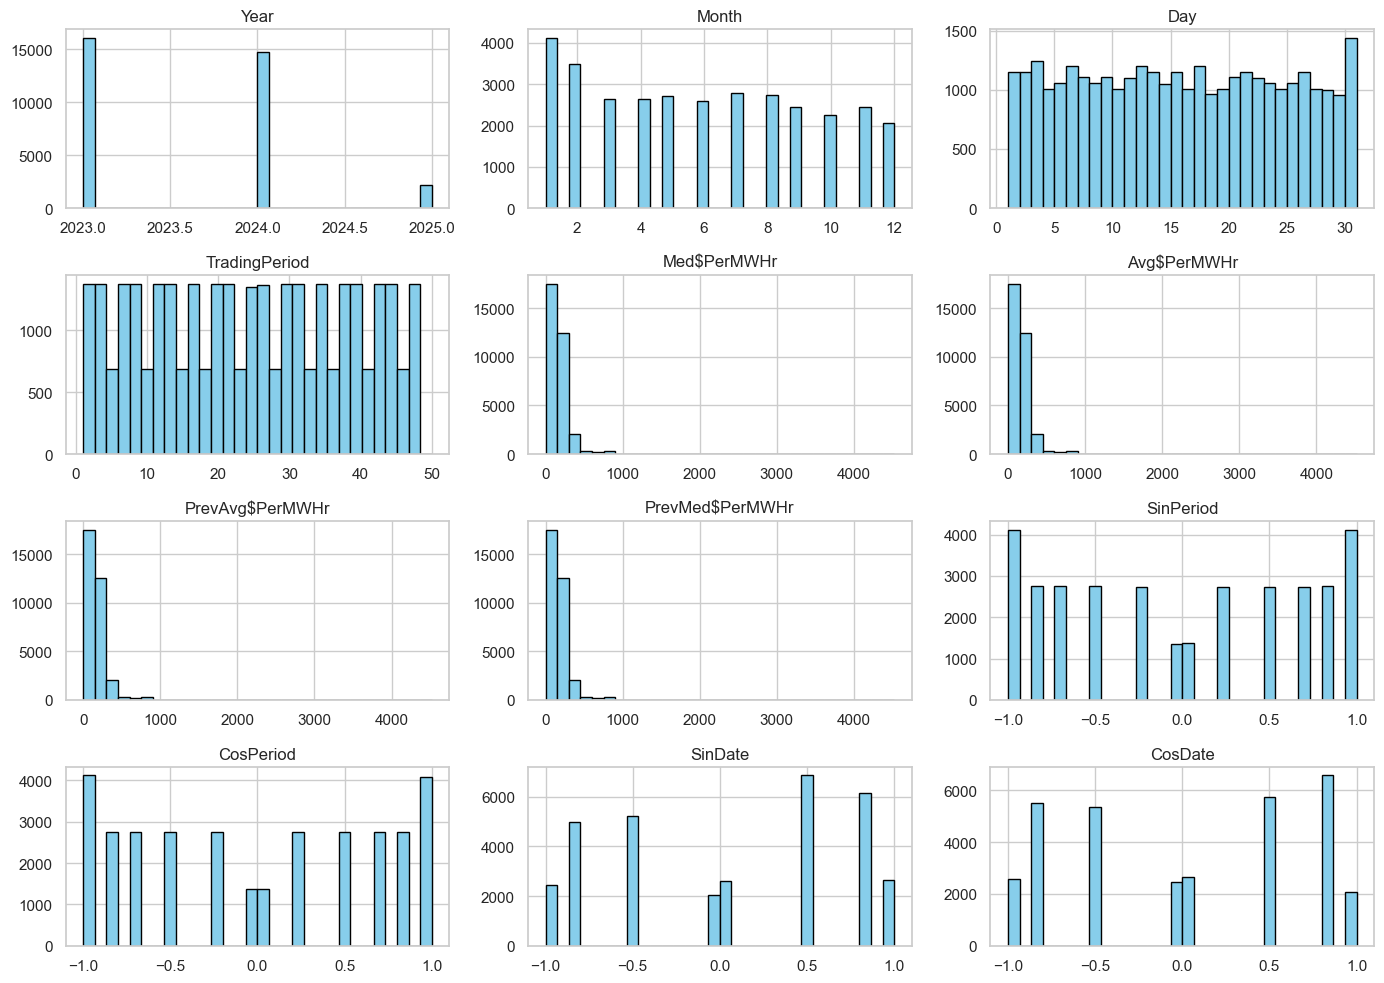

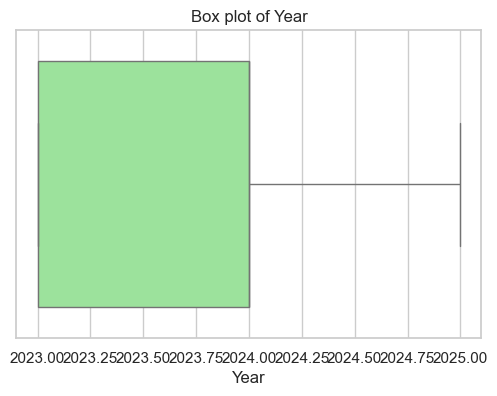

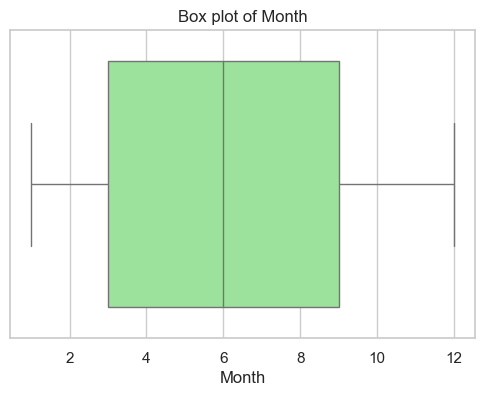

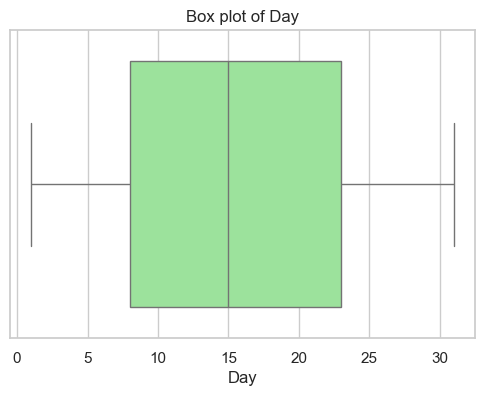

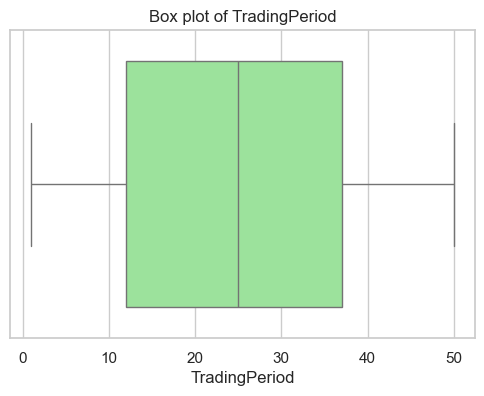

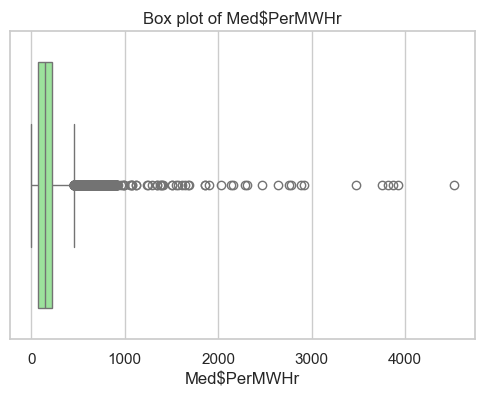

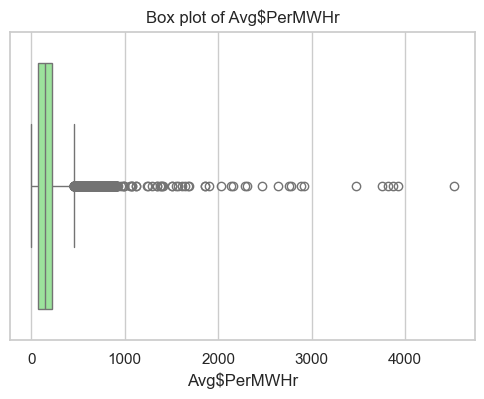

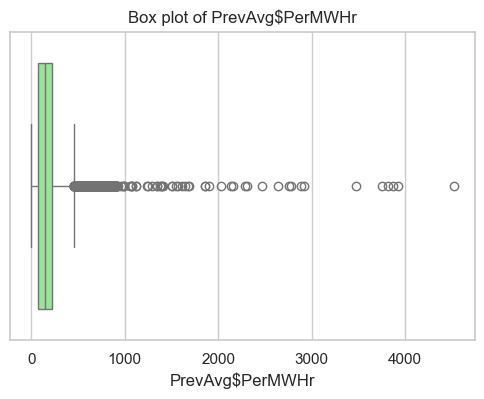

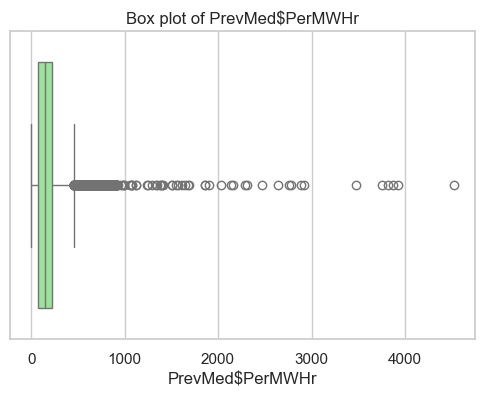

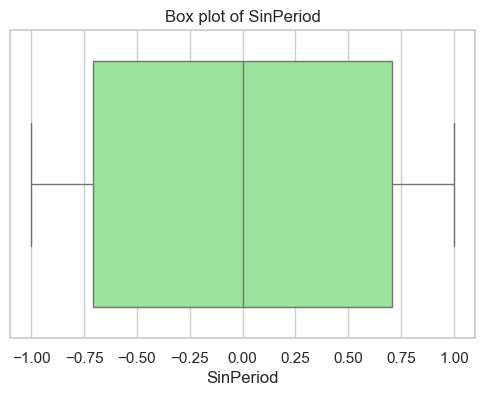

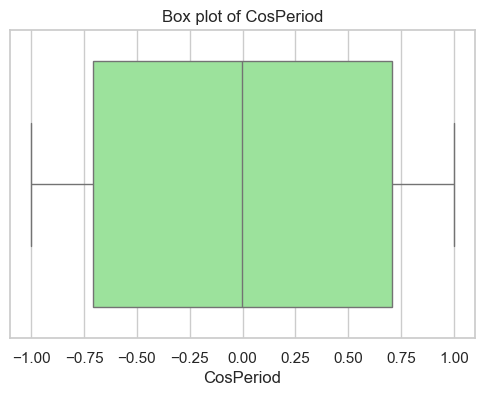

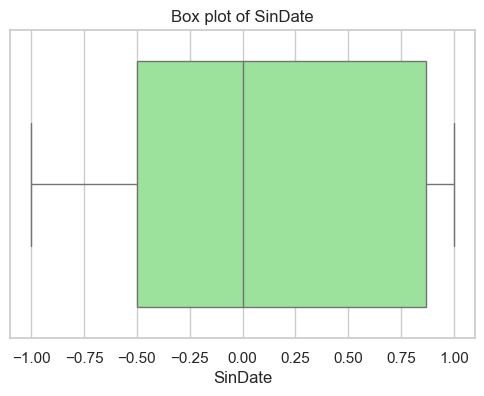

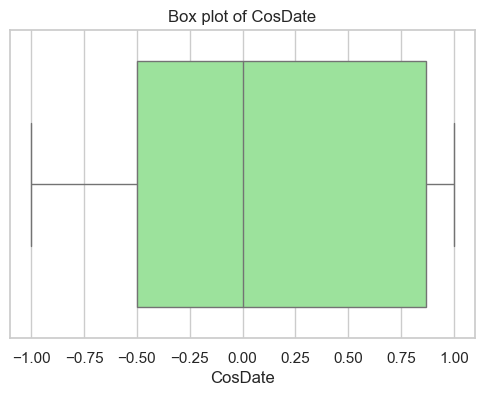

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Visualize the distribution of numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for all numerical features
df[numerical_columns].hist(figsize=(14, 10), bins=30, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

# Box plots for the distribution of values (checking for outliers)
for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Box plot of {col}')
    plt.show()


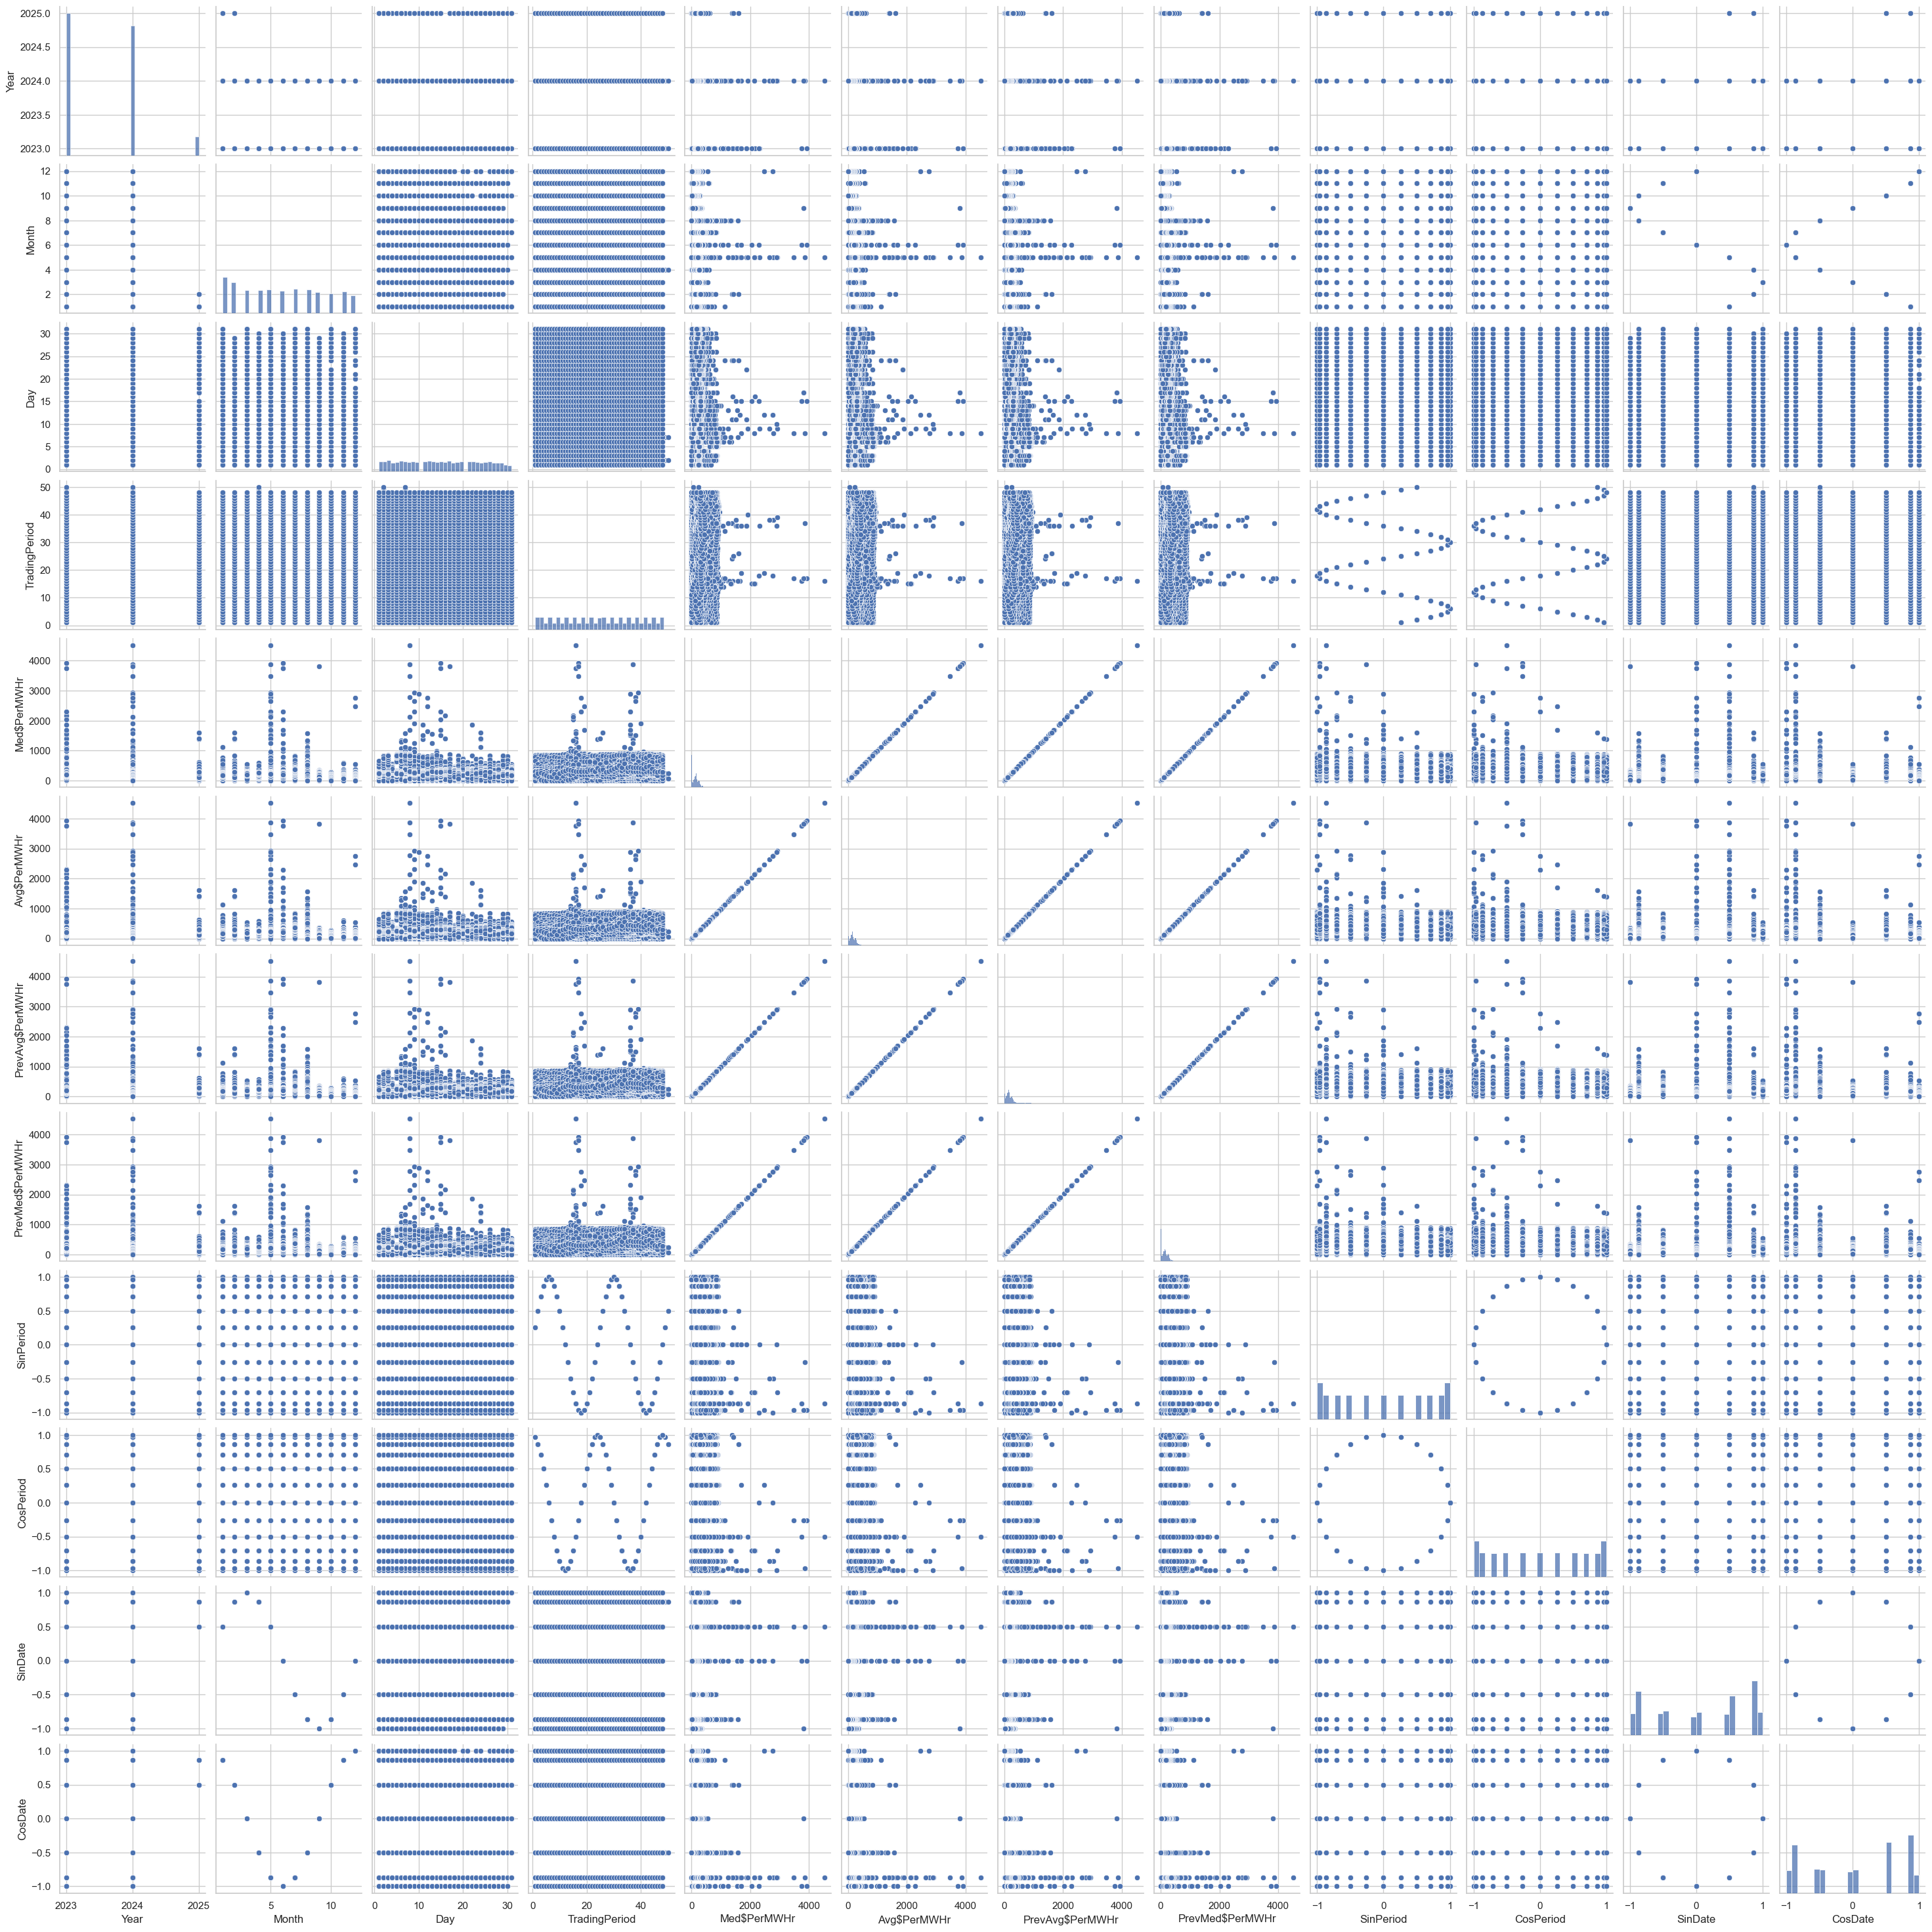

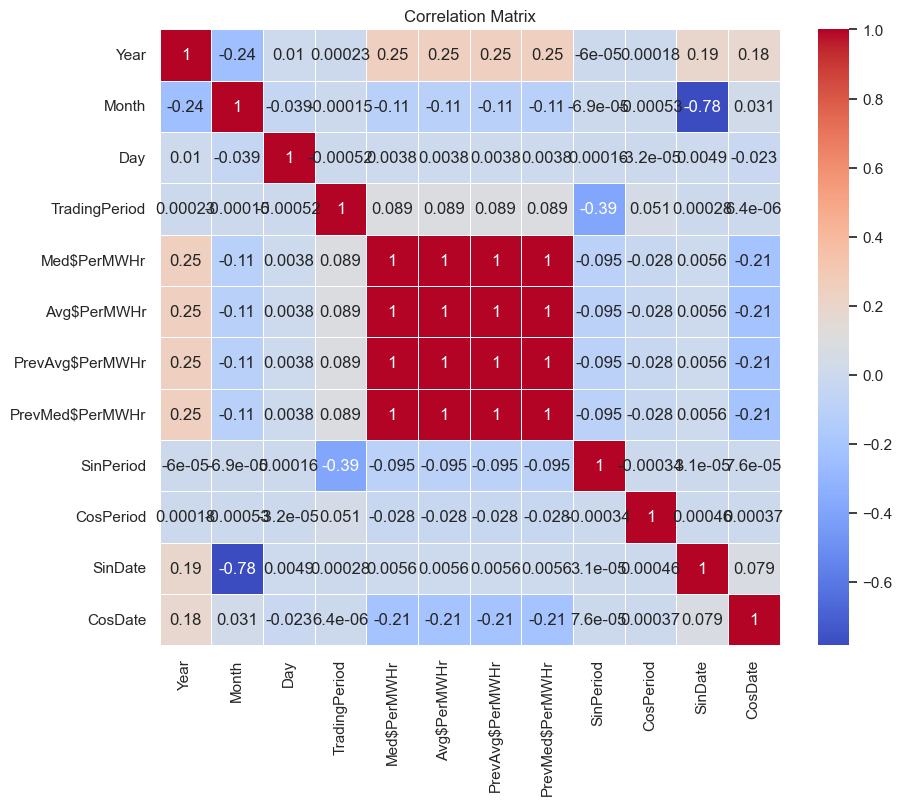

In [17]:
# Pair plot to visualize relationships between features
sns.pairplot(df[numerical_columns], height=2.5)
plt.show()

# Calculate the correlation matrix
corr = df[numerical_columns].corr()

# Heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


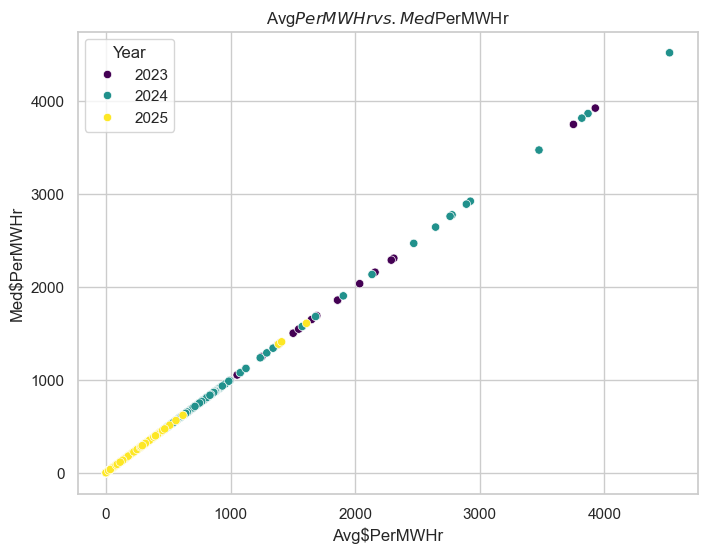

In [18]:
# Scatter plot for Avg$PerMWHr vs. Med$PerMWHr
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Avg$PerMWHr'], y=df['Med$PerMWHr'], hue=df['Year'], palette='viridis')
plt.title('Avg$PerMWHr vs. Med$PerMWHr')
plt.xlabel('Avg$PerMWHr')
plt.ylabel('Med$PerMWHr')
plt.show()


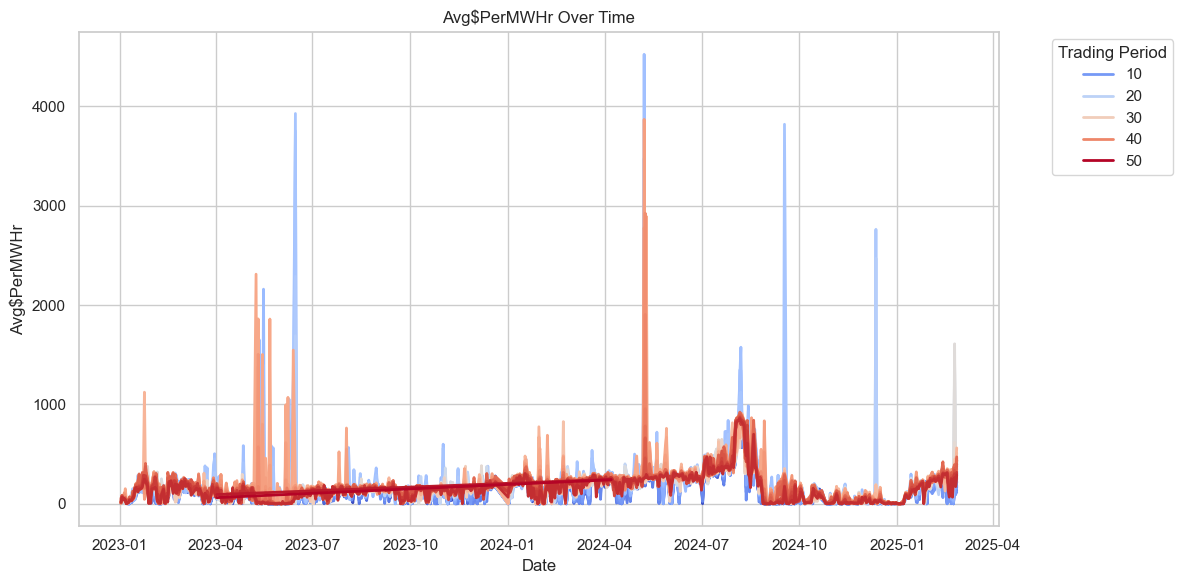

In [19]:
# Plot Avg$PerMWHr over time
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Avg$PerMWHr', hue='TradingPeriod', palette='coolwarm', lw=2)
plt.title('Avg$PerMWHr Over Time')
plt.xlabel('Date')
plt.ylabel('Avg$PerMWHr')
plt.legend(title='Trading Period', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


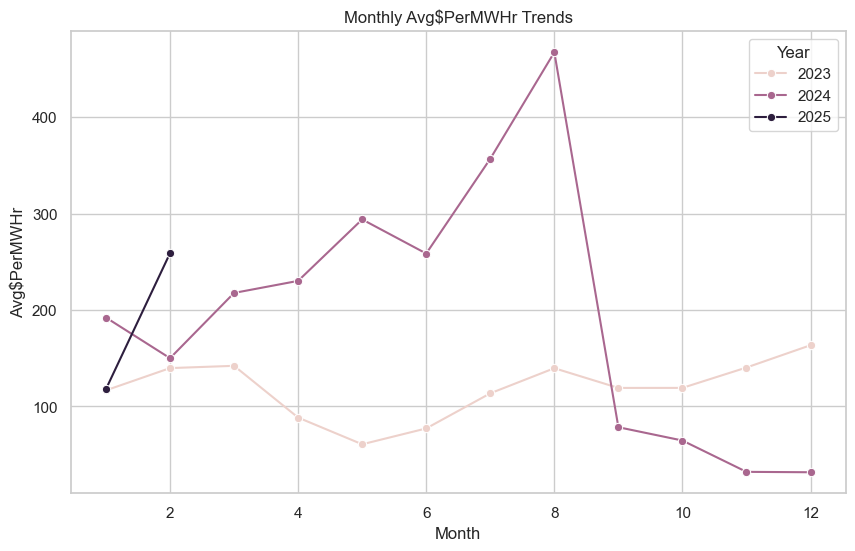

In [20]:
# Calculate average of Avg$PerMWHr per month
monthly_avg = df.groupby(['Year', 'Month'])['Avg$PerMWHr'].mean().reset_index()

# Plot Monthly Avg$PerMWHr trends
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_avg, x='Month', y='Avg$PerMWHr', hue='Year', marker='o')
plt.title('Monthly Avg$PerMWHr Trends')
plt.xlabel('Month')
plt.ylabel('Avg$PerMWHr')
plt.show()


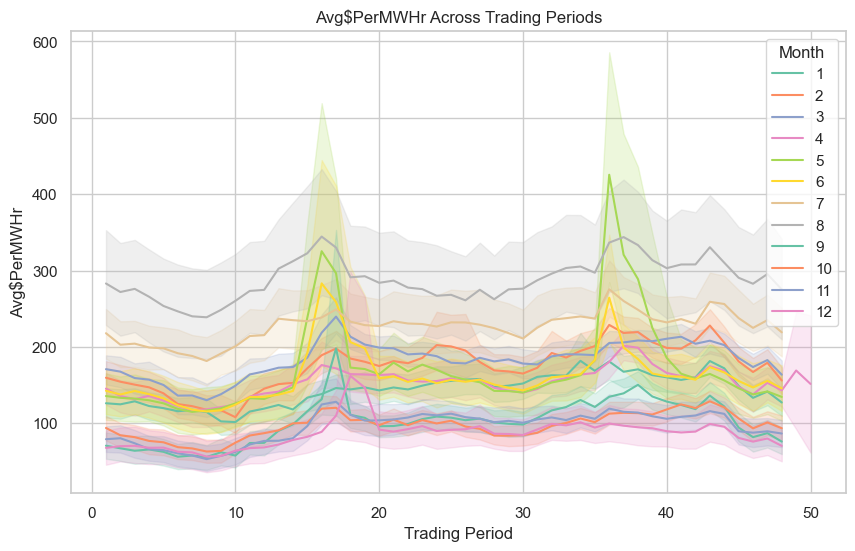

In [21]:
# Check if there's any sinusoidal trend for TradingPeriod (periodicity)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='TradingPeriod', y='Avg$PerMWHr', hue='Month', palette='Set2')
plt.title('Avg$PerMWHr Across Trading Periods')
plt.xlabel('Trading Period')
plt.ylabel('Avg$PerMWHr')
plt.show()


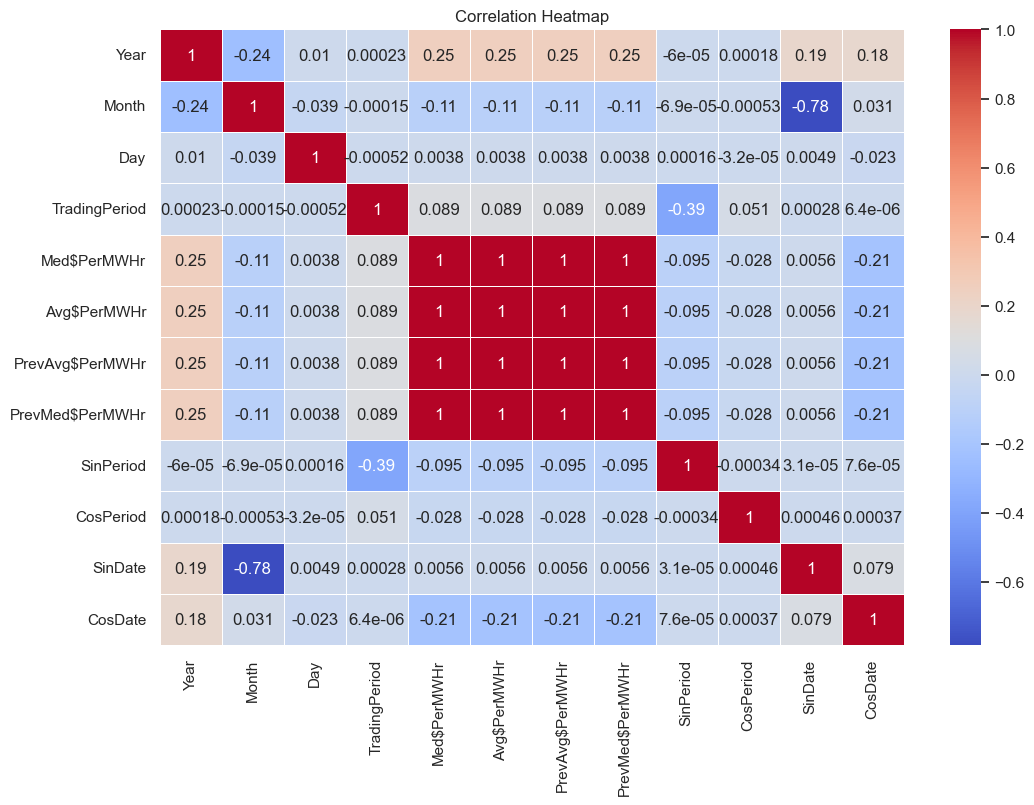

In [22]:
# Correlation plot for key features (e.g., Avg$PerMWHr, Med$PerMWHr, SinPeriod, etc.)
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()
